Descriptive Statistics:
count    15.000000
mean     31.933333
std       6.204453
min      22.000000
25%      27.500000
50%      31.000000
75%      35.500000
max      45.000000
Name: Age, dtype: float64


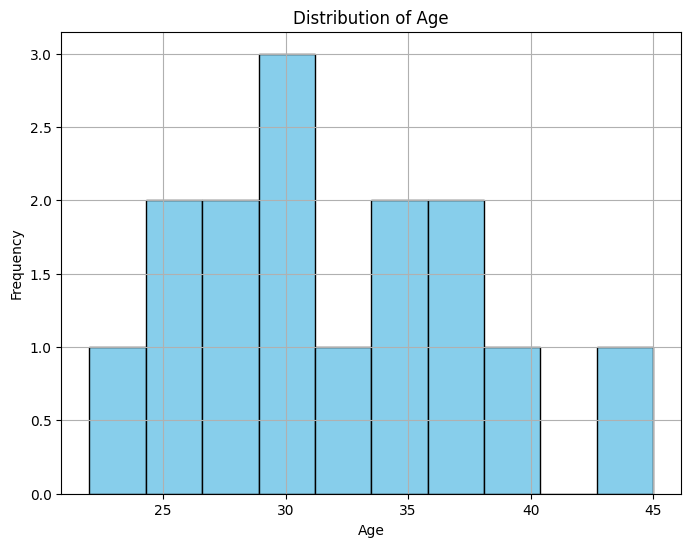

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (can be replaced with your own)
data = {
    'Age': [25, 30, 22, 40, 28, 35, 38, 31, 29, 45, 27, 26, 33, 34, 36]
}

# Convert to DataFrame
df = pd.DataFrame(data)

def analyze_distribution(df, column_name):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Column '{column_name}' is not numeric.")
        return

    # Descriptive statistics
    stats = df[column_name].describe()
    print("Descriptive Statistics:")
    print(stats)

    # Plotting histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_name].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Run the analysis
analyze_distribution(df, 'Age')
